## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Loading and Exploring the dataset

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
import seaborn as sns

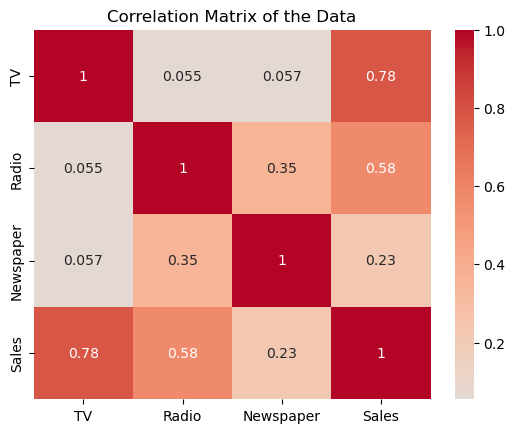

In [7]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('Correlation Matrix of the Data')
plt.show()

## Feature Selection and Splitting

In [8]:
X=df[['TV','Radio','Newspaper']]
Y=df[['Sales']]

## Model Training

In [9]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [10]:
trained_data1=lr.fit(x_train,y_train)

In [11]:
y_pred1=lr.predict(x_test)

## Evaluation using metrices

In [12]:
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
mse=mean_squared_error(y_pred1,y_test)
print(mse)

3.79679723671522


In [15]:
r2=r2_score(y_test,y_pred1)
r2

0.8609466508230368

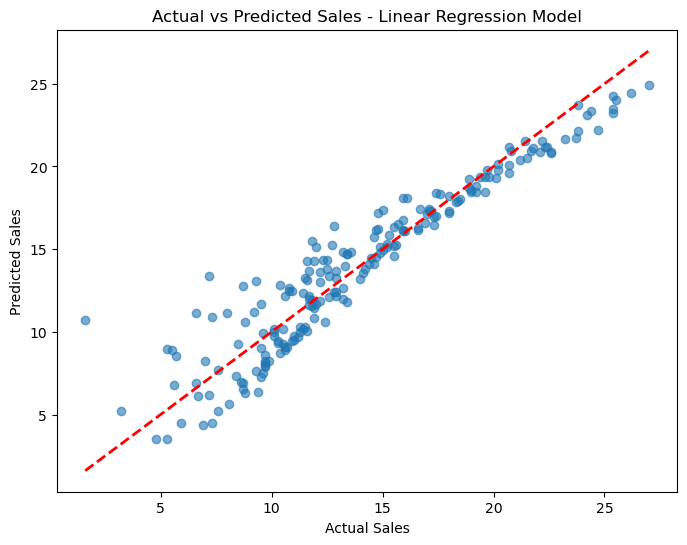

In [16]:
plt.figure(figsize=(8, 6))
y_pred_all = lr.predict(X)
plt.scatter(Y, y_pred_all, alpha=0.6)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2) 
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales - Linear Regression Model')
plt.show()

### Exploring models

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,random_state=42)
trained_data2=rfr.fit(x_train,y_train.squeeze())  #Here the squeeze func reshapes the data into 1D array.
y_pred2=rfr.predict(x_test)

In [18]:
y_train.shape

(140, 1)

In [19]:
r2=r2_score(y_test,y_pred1)
r2

0.8609466508230368

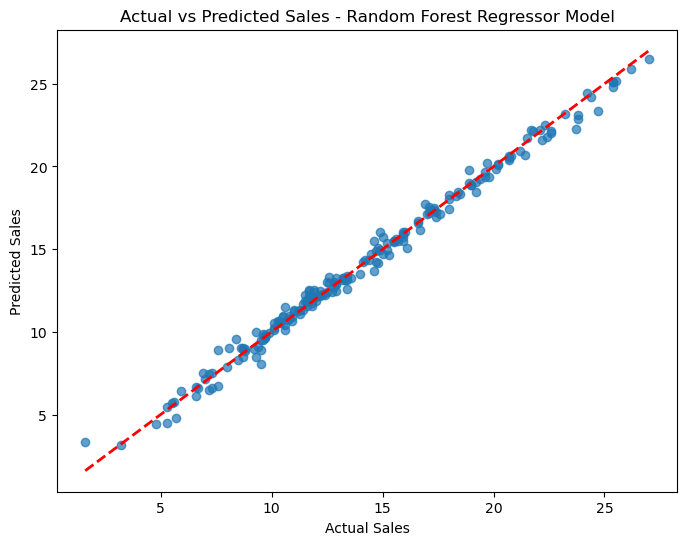

In [20]:
plt.figure(figsize=(8, 6))
y_pred_all = rfr.predict(X)
plt.scatter(Y, y_pred_all, alpha=0.7)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2) 
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales - Random Forest Regressor Model')
plt.show()

## Summary

- The comparison between Linear Regression and Random Forest Regressor shows that Random Forest Regressor delivers higher prediction accuracy, indicating it captures complex, nonlinear relationships in the data more effectively than a simple linear model.

 - The correlation matrix highlights strong positive correlations between TV and Radio advertising with Sales suggesting that these two marketing channels significantly contribute to revenue growth. Also the one variable called newspaper show a weak correlation as compared to the Radio and TV.
 
 - Therefore, companies can prioritize on advertising in TV and Radio rather then spending on Newspaper which we can make their company to gain profits.